# KNN ALGORITHM-salary estimation day-2


In [1]:
import pandas as pd
import numpy as np

In [2]:
dat=pd.read_csv("adult.csv")
dat.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
data=dat.drop(["workclass","fnlwgt","education","marital-status","occupation","relationship","race","gender","capital-loss","native-country"],axis="columns")

In [4]:
data.head(1)
dat.isna().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [5]:
data.shape

(48842, 5)

In [6]:
data.fillna(0)

,age,educational-num,capital-gain,hours-per-week,income
0,25,7,0,40,<=50K
1,38,9,0,50,<=50K
2,28,12,0,40,>50K
3,44,10,7688,40,>50K
4,18,10,0,30,<=50K
...,...,...,...,...,...
48837,27,12,0,38,<=50K
48838,40,9,0,40,>50K
48839,58,9,0,40,<=50K
48840,22,9,0,20,<=50K


mapping target data to 0 and 1

In [7]:
income_set=set(data["income"])
data["income"]=data["income"].map({"<=50K":0,">50K":1}).astype(int)
data.head()

,age,educational-num,capital-gain,hours-per-week,income
0,25,7,0,40,0
1,38,9,0,50,0
2,28,12,0,40,1
3,44,10,7688,40,1
4,18,10,0,30,0


In [8]:
x=data.drop(["income"],axis=1)
y=data.income


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=sns0)

tranforming our data using std scaler 

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [12]:
error=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'mean_error')

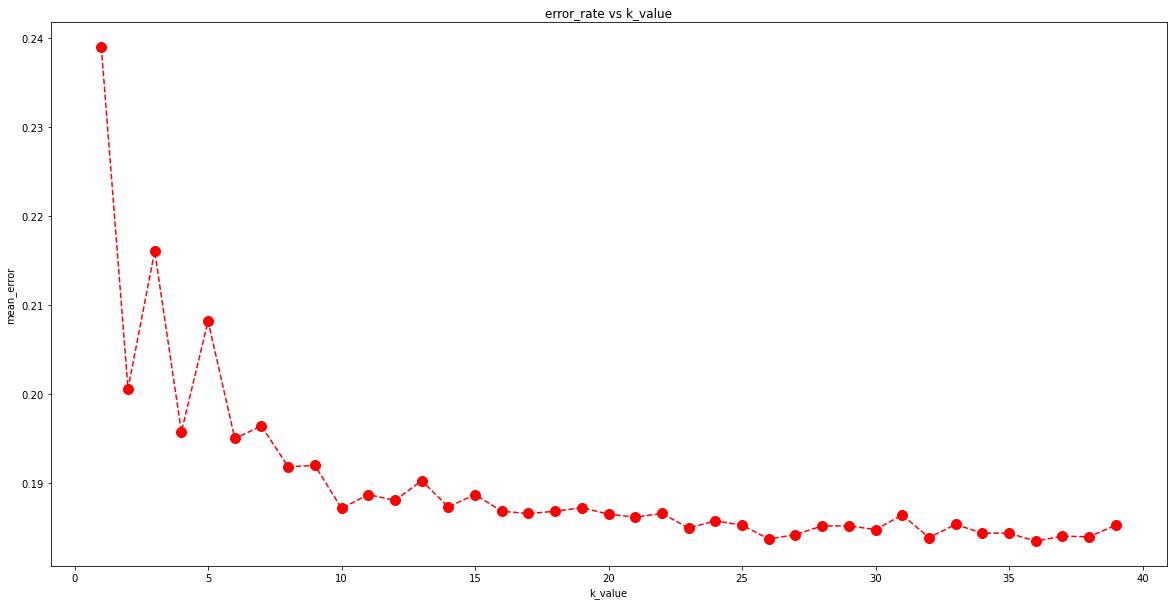

In [13]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),error,marker="o",linestyle="dashed",color="red",markersize=10)
plt.title("error_rate vs k_value")
plt.xlabel("k_value")
plt.ylabel("mean_error")

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
age=int(input("enter age: "))
en=int(input("education: "))
cg=int(input("enter capital_gain: "))
hpw=int(input("enter hour_per_week: "))
new=[[age,en,cg,hpw]]
result=model.predict(sc.transform(new))
print(result)
if result==1:
    print("employee got salary over 50k")
else:
    print("employee got salary less than 50k")

enter age: 10
education: 4
enter capital_gain: 45
enter hour_per_week: 54
[0]
employee got salary less than 50k


In [23]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)
print("accuracy_score for our KNN model is {0}%".format(accuracy_score(y_test,y_pred)*100))

confusion matrix:
[[8741  532]
 [1730 1208]]
accuracy_score for our KNN model is 81.4757186143641%


CONCLUSION:AS ABOVE WE GOT AROUND 81.4757186143641% ACCURACY FOR OUR KNN MODEL WHICH IS PRETTY GOOD I SAY IF WE WANT TO SLIGHTLY INCREASE THE ACCURACY THEN RANDOMLY CHANGE THE K VALUES FOR THE GIVEN ALGORITHM...